 ---
 # Prática 5: Análisis en el dominio del tiempo (DT) del circuito serie de primer orden R-C. Carga y Descarga de un Condesador.
 ---
> Autores: Jorge del Río López, Carlos González García y Javier Rodríguez Urbano.
>
> Fecha: 2024-11-26
>
> Curso 24-45 
---
<div style="text-align: center;">
    <img src="https://i.pinimg.com/736x/e8/6c/d4/e86cd4446daa867f88666c90ec10b0d4.jpg" alt="Logo" style="width: 20%;"/>
</div>


In [661]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
# Definimos el valor de Pi
Pi = 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093

In [662]:
# Importamos el fichero que contiene los datos.
xlsx_name="P5_PlantillaMedidasEstudiantes.ods"

In [663]:
#Creamos una funcion para convertir n listas en arrays.
def ConverArray3 (lista,lista2,lista3):
    return np.array(lista), np.array(lista2),np.array(lista3)

def ConverArray2 (lista,lista2):
    return np.array(lista), np.array(lista2)

#Funcioón que usaremos para calcular errores relativos.
def ErrorRelativo(exp,teor):
    return (abs(exp - teor)/abs(teor))*100




---
<h1 style="text-align: center;">[P5.C1]</h1>

---


In [664]:
DatosParte1 = pd.read_excel(xlsx_name,sheet_name="RC")

# Extraemos los valores:

ValorResistencia = DatosParte1["R"].tolist()
ValorCondensador = DatosParte1["C"].tolist()


# Extraemos los valores Teóricos y Prácticos.

#--------------------------------------------------------------
#Resistencia
#--------------------------------------------------------------

ResistenciaTeo = ValorResistencia[0]
ResistenciaPra = ValorResistencia[1]

#--------------------------------------------------------------
# Capacidad
#--------------------------------------------------------------

CapacidadTeo = ValorCondensador[0]
CapacidadPra = ValorCondensador[1]


# Calculo del valor del tiempo de Relajación teórico.

TiempoRelajacionTeo = ResistenciaTeo*CapacidadTeo

# Calculo del valor del tiempo de Relajación práctico.

TiempoRelajacionPra = ResistenciaPra*CapacidadPra

print(f'La Resistencia teórica es: {round(ResistenciaTeo,2)} Ohms.')
print(f'La Resistencia práctica es: {round(ResistenciaPra,2)} Ohms.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(ResistenciaPra,ResistenciaTeo),2)} %.\n')

print(f'La Capacidad teórica es: {CapacidadTeo} F.')
print(f'La Capacidad práctica es: {CapacidadPra} F.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(CapacidadPra,CapacidadTeo),2)} %.\n')


print(f'El tiempo de relajación Teórica es: {round(TiempoRelajacionTeo,2)} s.')
print(f'El tiempo de relajación Práctica es: {round(TiempoRelajacionPra,2)} s.')
print(f'Esto nos proporciona un error relativo del: {round(ErrorRelativo(TiempoRelajacionPra,TiempoRelajacionTeo),2)} %.')

La Resistencia teórica es: 10000 Ohms.
La Resistencia práctica es: 9930 Ohms.
Esto nos proporciona un error relativo del: 0.7 %.

La Capacidad teórica es: 0.0047 F.
La Capacidad práctica es: 0.00413 F.
Esto nos proporciona un error relativo del: 12.13 %.

El tiempo de relajación Teórica es: 47.0 s.
El tiempo de relajación Práctica es: 41.01 s.
Esto nos proporciona un error relativo del: 12.74 %.


---
<h1 style="text-align: center;">[P5.C2]</h1>

---

En este apartado haremos un ajsute lineal y un ajuste exponencial de los datos,referidos a la carga del condensador que tomamos en el laboratorio.
La ecuacion que seguira el ajuste lineal será:

$log(1-\dfrac{v_c}{V_s})\ =\ \dfrac{log(e)}{\tau}\ t -\ \dfrac{t_0}{\tau}log(e) $

donde tomaremos como base del logaritmo el número e.!!!!!COMPROBAR QUE SEA LA BUENA

La ecuación que seguira el ajuste exponencial será:

$v_c = V_s(1- e^{-\dfrac{(t-t_0)}{\tau}})$


In [665]:
DatosParte2 = pd.read_excel(xlsx_name,sheet_name="DatosEnTiempo")

# Extraemos los valores:
Tiempo = DatosParte2["t"].tolist()
VoltajeCondensador = DatosParte2["vc"].tolist()

# Extraemos los valores de la fuente.
VoltajeFuenteCONSTANTE = DatosParte2["Vs"].tolist()
VoltajeFuente =  VoltajeFuenteCONSTANTE[0]

# Creamos la variable de TiempoLista y VoltajeList para tener los datos en una lista para el posterior uso de los atributos de lista. 
TiempoLista = Tiempo.copy()
VoltajeCondensadorLista = VoltajeCondensador.copy()

Tiempo, VoltajeCondensador = ConverArray2(Tiempo,VoltajeCondensador)

Datos:
     t[s]  Vc[V]
0       1   0.00
1       2   0.00
2       3   0.21
3       4   0.33
4       5   0.57
..    ...    ...
193   194   9.29
194   195   9.29
195   196   9.30
196   197   9.30
197   198   9.30

[198 rows x 2 columns]

Datos ajuste: Pendiente= 0.01373118079889366 1/s 
Ordenada en el origen:  0.2341604216019739 
 coorel coef= [[ 2.69770922e-08 -2.68422067e-06]
 [-2.68422067e-06  3.55211869e-04]]
Parámetros ajustados: a = 57.0425, b = -0.6971


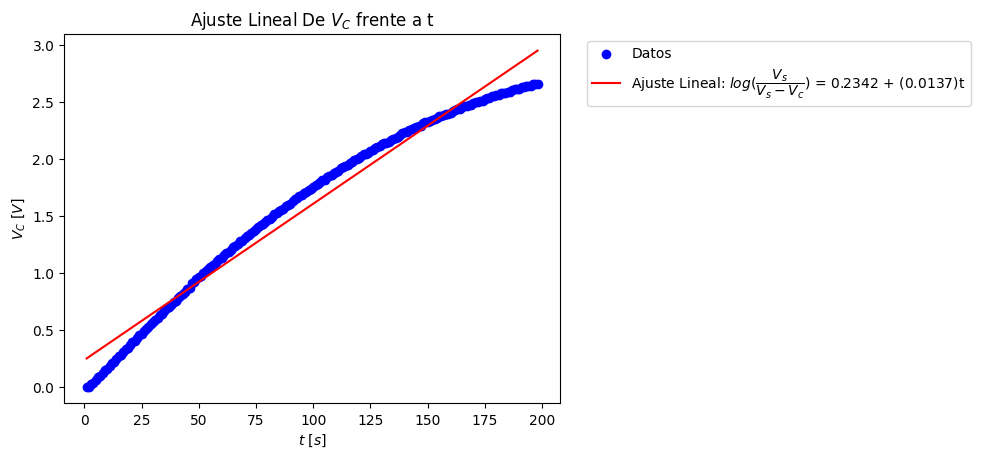

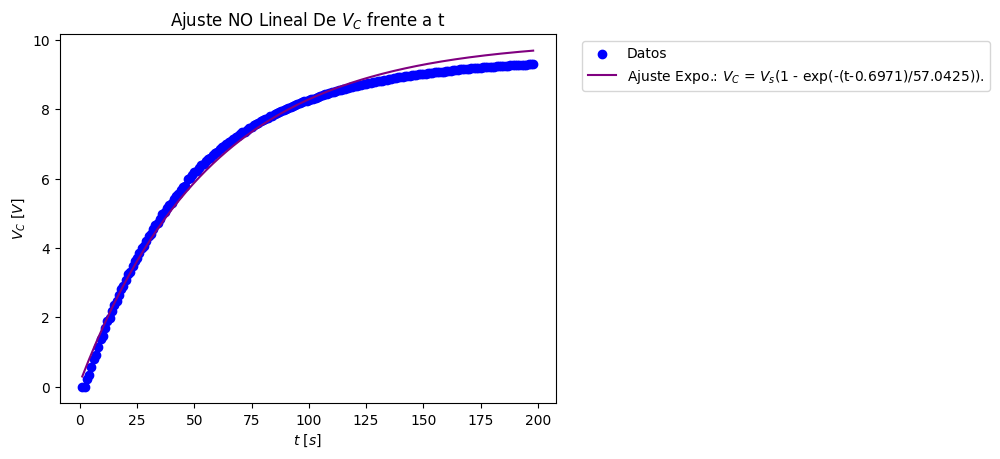

In [666]:
# Separamos los valores de la Carga de los valores de la Descarga

VoltajeCondensadorCarga = VoltajeCondensador[0:198].copy()
VoltajeCondensadorDesCarga = VoltajeCondensador[198:350].copy()

TiempoCarga = Tiempo[0:198].copy()
TiempoDesCarga = Tiempo[198:350].copy()

#----------------------------------------------------------------------------------------------------------------------------------
# Parte LINEAL
#----------------------------------------------------------------------------------------------------------------------------------

# Exponemos los valores del tiempo y el votaje (de la carga) en una tabla.

data = {'t[s]': TiempoCarga,
        'Vc[V]': VoltajeCondensadorCarga}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')

# Obtenemos los valores de la abcisas
Ejey_CargaLineal = []
for i in VoltajeCondensadorCarga:
   Ejey_CargaLineal.append(np.log((VoltajeFuente/(VoltajeFuente-i))))


# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[PendienteCargaLineal, OrdenadaOrigenCargaLineal], r = np.polyfit(TiempoCarga,Ejey_CargaLineal,deg=1,cov=True)
print("Pendiente=", PendienteCargaLineal,"1/s","\nOrdenada en el origen: ", OrdenadaOrigenCargaLineal,"\n coorel coef=",r)



# Crear una función para la línea ajustada
def ajuste_linealCarga(x):
    return PendienteCargaLineal * x + OrdenadaOrigenCargaLineal

#----------------------------------------------------------------------------------------------------------------------------------
# Parte EXPONENCIAL
#----------------------------------------------------------------------------------------------------------------------------------

def exponencialCarga(x,a,b):

    return VoltajeFuente * (1 - np.exp(-(x/a))*np.exp(b/a))

# Ajuste de la curva
Parametros, covariance = curve_fit(exponencialCarga,TiempoCarga,VoltajeCondensadorCarga)

# Parámetros ajustados
a_fit, b_fit = Parametros
print(f"Parámetros ajustados: a = {a_fit:.4f}, b = {b_fit:.4f}")
                                                                                                                                                            

# Graficamos los datos y el ajuste lineal
plt.scatter(TiempoCarga, Ejey_CargaLineal, label='Datos', color='blue')
plt.plot(TiempoCarga, ajuste_linealCarga(TiempoCarga), color='red', label=fr'Ajuste Lineal: $log(\dfrac{{V_s}}{{V_s - V_c}})$ = {OrdenadaOrigenCargaLineal:.4f} + ({PendienteCargaLineal:.4f})t')
plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title(r'Ajuste Lineal De $V_C$ frente a t')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

plt.scatter(TiempoCarga, VoltajeCondensadorCarga, label='Datos', color='blue')
plt.plot(TiempoCarga, exponencialCarga(TiempoCarga,a_fit,b_fit), color='purple', label=fr'Ajuste Expo.: $V_C$ = $V_s$(1 - exp(-(t{round(b_fit,4)})/{round(a_fit,4)})).')
plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title(r'Ajuste NO Lineal De $V_C$ frente a t')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()




In [667]:
#----------------------------------------------------------------------------------------------------------------------------------
# Parte Lineal
#----------------------------------------------------------------------------------------------------------------------------------

# A partir de los datos de la Ordenada en el origen y de la pendiente obtenemos los valores de C y tau.

TauPracticaCargaLineal =  1 / PendienteCargaLineal

# Calculamos el tiempo t0

Tiempo0 = OrdenadaOrigenCargaLineal*TauPracticaCargaLineal

# Calculamos el valor de C
CapacidadPracticaCarga = TauPracticaCargaLineal/ResistenciaPra

print(f'El tiempo de relajación Teórica es: {round(TauPracticaCargaLineal,2)} s.')
print(f'La capacidad resultante es: {round(CapacidadPracticaCarga,4)} F.')

El tiempo de relajación Teórica es: 72.83 s.
La capacidad resultante es: 0.0073 F.


In [668]:
#----------------------------------------------------------------------------------------------------------------------------------
# Parte Exponencial
#----------------------------------------------------------------------------------------------------------------------------------

# A partir de los datos de la a y b obtenemos los valores de C y tau.

TauPracticaCargaExpo =  a_fit

# Calculamos el tiempo t0

Tiempo0Expo = b_fit
# Calculamos el valor de C
CapacidadPracticaCargaExpo = TauPracticaCargaExpo/ResistenciaPra

print(f'El tiempo de relajación Teórica es: {round(TauPracticaCargaExpo,2)} s.')
print(f'La capacidad resultante es: {round(CapacidadPracticaCargaExpo,4)} F.')

El tiempo de relajación Teórica es: 57.04 s.
La capacidad resultante es: 0.0057 F.


---
<h1 style="text-align: center;">[P5.C3]</h1>

---


En este apartado haremos un ajsute lineal de los datos,referidos a la descarga del condensador, que tomamos en el laboratorio.
La ecuacion que seguira el ajuste lineal será:

$log(\dfrac{v_c}{V_s})\ =\ -\dfrac{log(e)}{\tau}\ t +\ \dfrac{t_1}{\tau}log(e) $


donde tomaremos como base del logaritmo e.!!!!!COMPROBAR QUE SEA LA BUENA




Datos:
     t[s]  Vc[V]
0     199  9.302
1     200  9.244
2     201  9.123
3     202  8.890
4     203  8.665
..    ...    ...
147   346  0.497
148   347  0.486
149   348  0.480
150   349  0.470
151   350  0.459

[152 rows x 2 columns]

Datos ajuste: R= -0.020029119463241866 1/s 
Ordenada en el origen:  3.90867426360618 
 coorel coef= [[ 3.56964536e-10 -9.79867652e-08]
 [-9.79867652e-08  2.75846130e-05]]


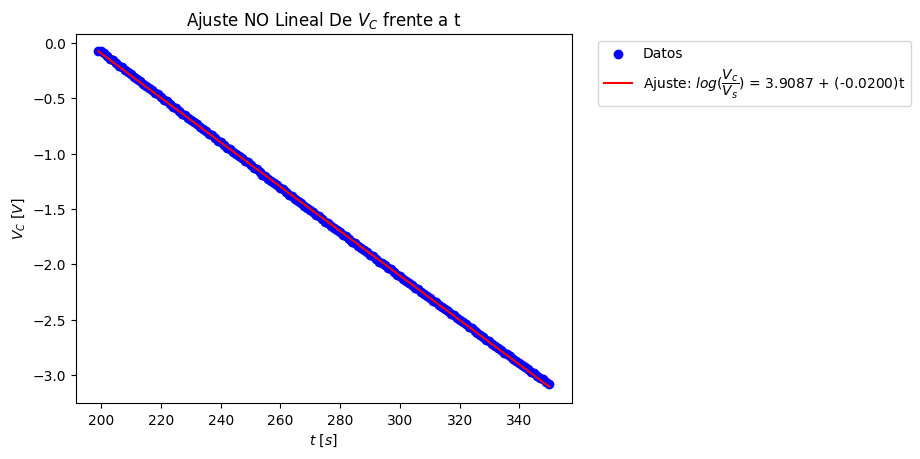

In [669]:
#----------------------------------------------------------------------------------------------------------------------------------
# Parte LINEAL
#----------------------------------------------------------------------------------------------------------------------------------

# Exponemos los valores del tiempo y el votaje (de la carga) en una tabla.
data = {'t[s]': TiempoDesCarga,
        'Vc[V]': VoltajeCondensadorDesCarga}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')
# Obtenemos los valores de la abcisas

Ejey_DesCargaLineal = []
for i in VoltajeCondensadorDesCarga:
    Ejey_DesCargaLineal.append(np.log((i/VoltajeFuente)))

# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[PendienteDesCargaLineal, OrdenadaOrigenDesCargaLineal], r = np.polyfit(TiempoDesCarga,Ejey_DesCargaLineal,deg=1,cov=True)
print("R=", PendienteDesCargaLineal,"1/s","\nOrdenada en el origen: ", OrdenadaOrigenDesCargaLineal,"\n coorel coef=",r)


# Crear una función para la línea ajustada
def ajuste_linealDesCarga(x):
    return OrdenadaOrigenDesCargaLineal + PendienteDesCargaLineal * x

                                                                                                                                                            
# Graficamos los datos y el ajuste lineal
plt.scatter(TiempoDesCarga, Ejey_DesCargaLineal, label='Datos', color='blue')
plt.plot(TiempoDesCarga, ajuste_linealDesCarga(TiempoDesCarga), color='red', label=fr'Ajuste: $log(\dfrac{{V_c}}{{V_s}})$ = {OrdenadaOrigenDesCargaLineal:.4f} + ({PendienteDesCargaLineal:.4f})t')
plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title(r'Ajuste NO Lineal De $V_C$ frente a t')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [670]:
# A partir de los datos de la Ordenada en el origen y de la pendiente obtenemos los valores de C y tau.

TauPracticaDesCargaLineal = - 1/PendienteDesCargaLineal

# Calculamos el tiempo t1
Tiempo1 = OrdenadaOrigenDesCargaLineal *TauPracticaDesCargaLineal

# Calculamos el valor de C
CapacidadPracticaDesCarga = TauPracticaDesCargaLineal/ResistenciaPra

print(f'El tiempo de relajación Teórica es: {round(TauPracticaDesCargaLineal,2)} s.')
print(f'El valor de la Capacidad es: {round(CapacidadPracticaDesCarga,5)} F.')

El tiempo de relajación Teórica es: 49.93 s.
El valor de la Capacidad es: 0.00503 F.


---
<h1 style="text-align: center;">[P5.C4]</h1>

---



Ahora nos piden que comparemos los valores de $\tau$. EXPLICAR DE DONDE SALEN

$\tau_{Carga}\ =\ 72.83\ s$

$\tau_{Descarga}\ =\ 49.93\ s$

$\tau_{Teórico}\ =\ 47.00\ s$

$\tau_{Práctica}\ =\ 41.00\ s$

Para cada uno de estos valores obtenemos un error relativo, tomando el valor teórico como correcto llegamos a:


$\epsilon_R(Carga)\ =\ $

$\epsilon_R(Descarga)\ =\ $

$\epsilon_R(Práctica)\ =\ $

---
<h1 style="text-align: center;">[P5.C5]</h1>

---


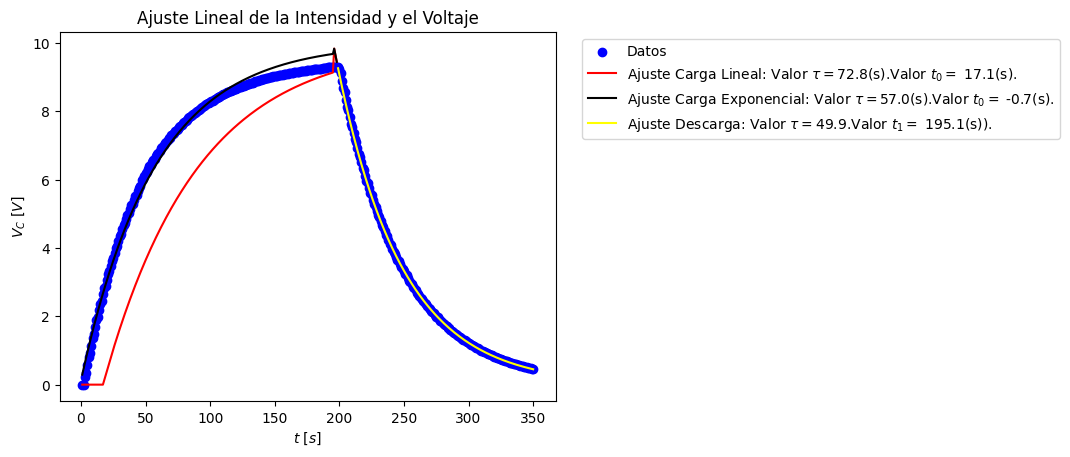

In [671]:
# Creamos las funciones que definen los valores del voltaje dependiendo del valor del Tiempo
def VoltajeCondFUNCION(t):
    if t <= Tiempo0:
        return 0.0
    elif Tiempo0 < t < Tiempo1:
        return(VoltajeFuente*(1-np.exp(-(t-Tiempo0)/(TauPracticaCargaLineal))))
    elif t >= Tiempo1:
        return(VoltajeFuente*(np.exp(-(t-Tiempo1)/(TauPracticaDesCargaLineal))))
    
def VoltajeCondFUNCIONExpo(t):
    if t <= Tiempo0Expo:
        return 0.0
    elif Tiempo0Expo < t < Tiempo1:
        return(VoltajeFuente*(1-np.exp(-(t-Tiempo0Expo)/(TauPracticaCargaExpo))))
    elif t >= Tiempo1:
        return(VoltajeFuente*(np.exp(-(t-Tiempo1)/(TauPracticaDesCargaLineal))))





# Definimos las listas que guardaran los valores del eje y.
EjeyCarga = []
Ejey_CargaExpo = [] 

EjeyDesCarga = []

for i in TiempoCarga:
    EjeyCarga.append(VoltajeCondFUNCION(i))
    Ejey_CargaExpo.append(VoltajeCondFUNCIONExpo(i))

for i in TiempoDesCarga:
    EjeyDesCarga.append(VoltajeCondFUNCION(i))

# Graficamos los datos y el ajuste lineal
plt.scatter(Tiempo, VoltajeCondensador, label='Datos', color='blue')

plt.plot(TiempoCarga, EjeyCarga, color='red', label=fr'Ajuste Carga Lineal: Valor $\tau =${TauPracticaCargaLineal:.1f}(s).Valor $t_0 =$ {Tiempo0:.1f}(s).')
plt.plot(TiempoCarga, Ejey_CargaExpo, color='black', label=fr'Ajuste Carga Exponencial: Valor $\tau =${TauPracticaCargaExpo:.1f}(s).Valor $t_0 =$ {Tiempo0Expo:.1f}(s).')

plt.plot(TiempoDesCarga, EjeyDesCarga, color='yellow', label=fr'Ajuste Descarga: Valor $\tau =${TauPracticaDesCargaLineal:.1f}.Valor $t_1 =$ {Tiempo1:.1f}(s)).')



plt.xlabel(r'$t\ [s]$')
plt.ylabel(r'$V_{C} \ [V]$')
plt.title('Ajuste Lineal de la Intensidad y el Voltaje')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()


---
<h1 style="text-align: center;">[P5.C6]</h1>

---

In [672]:
# Creamos la función que nos piden:

def Fourier(v,t,f):
    suma = 0
    N = len(t)
    for j,k in enumerate(t):  
        if j != 0 and j != len(t)-1:
            IncrementoT = (t[j+1]-t[j-1])/2
            suma += v[j] * IncrementoT * np.exp(-1.0j * k * 2 * np.pi * np.abs(f))
    return suma/N # Normalizamos el resultado
    #return suma


---
<h1 style="text-align: center;">[P5.C7]</h1>

---

In [673]:
# Definimos la funcion de la Fuente para su Posterior uso.
def FuncionVoltageFue(t):
    if t <= Tiempo0:
        return 0.0
    elif Tiempo0 < t < Tiempo1:
        return(10)
    elif t >= Tiempo1:
        return 0.0

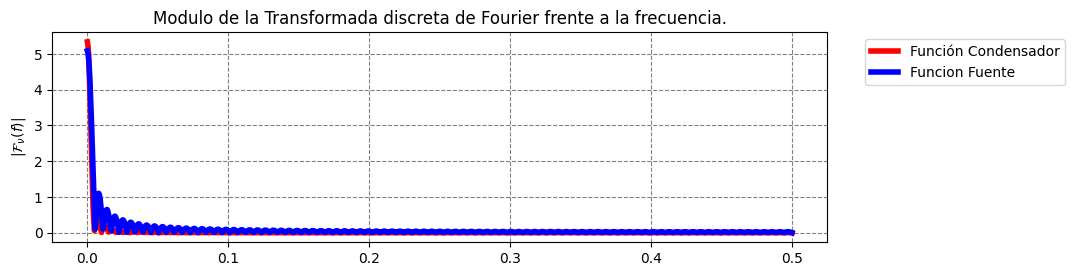

In [674]:
VoltajeFuenteLista=[]

FourierVoltajeConde = []
FourierVoltajeFuente = []

ModuloFuncionCondensador = []
ModuloFuente = []

FaseFuncionCondensador = []
FaseFuente = []

frec = np.linspace(0,0.5,1000)


for i in Tiempo:
    VoltajeFuenteLista.append(FuncionVoltageFue(i))
VoltajeFuenteLista = np.array(VoltajeFuenteLista)

# Calculamos la Transformada discreta de Fourier
for i in frec:
    FourierVoltajeConde.append(Fourier(VoltajeCondensador,Tiempo,i))
    FourierVoltajeFuente.append(Fourier(VoltajeFuenteLista,Tiempo,i))

for i in FourierVoltajeConde:
    ModuloFuncionCondensador.append(np.abs(i))
    FaseFuncionCondensador.append(np.angle(i))
    
for i in FourierVoltajeFuente:
    ModuloFuente.append(np.abs(i))
    FaseFuente.append(np.angle(i))

# Graficar el diagrama de  Bode - Ganancia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frec, ModuloFuncionCondensador,label="Función Condensador",color="red",lw=4) 
plt.plot(frec, ModuloFuente,label="Funcion Fuente",color="blue",lw=4) 


plt.title("Modulo de la Transformada discreta de Fourier frente a la frecuencia.")
plt.ylabel(r"$|\mathcal{F}_\nu (f)|$")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

plt.show()

---
<h1 style="text-align: center;">[P4.C8]</h1>

---

1.0500146067415734 0.0
1.0377141218059611 0.0005005005005005005
1.0014715093786255 0.001001001001001001
0.9432082120955319 0.0015015015015015015
0.8659337845808641 0.002002002002002002
0.7734136649739937 0.0025025025025025025
0.6695664662737442 0.003003003003003003
0.557256042659307 0.0035035035035035035
0.43537267999534796 0.004004004004004004
0.2897855668670575 0.0045045045045045045
0.09231039449314393 0.005005005005005005
2.103843841122569 0.0055055055055055055
1.1372949976578448 0.006006006006006006
0.6994311272587 0.0065065065065065065
0.5569176669977934 0.007007007007007007
0.4680268738717386 0.0075075075075075074
0.3910073958462835 0.008008008008008008
0.3122521723579695 0.008508508508508508
0.22556160910691503 0.009009009009009009
0.1251781125872025 0.00950950950950951
0.015418078479413188 0.01001001001001001
0.2276705154602163 0.01051051051051051
1.2033371558653612 0.011011011011011011
1.2406691881483014 0.011511511511511512
0.5131326265196106 0.012012012012012012
0.3532132289

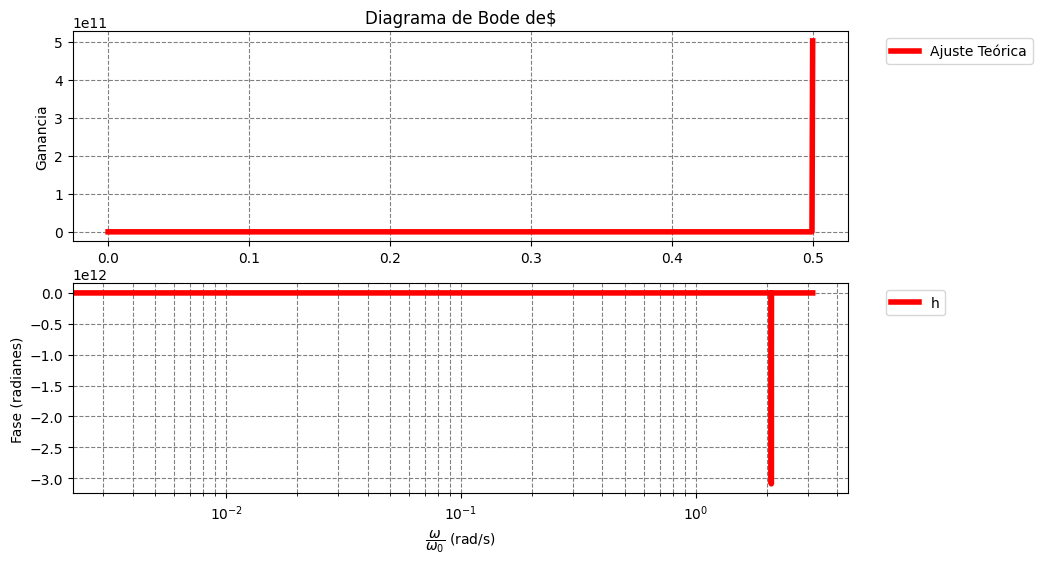

In [675]:

Ganancia = []
Fase = []
FrecuenciaAngu = []
for i in frec:
    FrecuenciaAngu.append(2*Pi*i)

j = 0
for i in ModuloFuncionCondensador:
    Ganancia.append(i/ModuloFuente[j])
    print((i/ModuloFuente[j]),frec[j])
    #Ganancia.append(20*np.log10(ModuloFuente[j])) 
    #Ganancia.append(20*np.log10(i)) 
    #Ganancia.append(20*np.log10(i/ModuloFuente[j]))
    j += 1
j = 0
for i in FaseFuncionCondensador:
    if FaseFuente[j] != 0:
        Fase.append(i / FaseFuente[j])
    else:
        Fase.append(0)
    j += 1

"""
Ganancia = []
Fase = []

for i, modulo_cond in enumerate(ModuloFuncionCondensador):
    modulo_fuente = ModuloFuente[i]
    if modulo_fuente != 0:
        #Ganancia.append(20 * np.log10(modulo_cond/modulo_fuente))
        Ganancia.append((modulo_cond/modulo_fuente))
    else:
        Ganancia.append(0)  # O algún valor apropiado

for i, fase_cond in enumerate(FaseFuncionCondensador):
    fase_fuente = FaseFuente[i]
    if fase_fuente != 0:
        Fase.append(fase_cond -fase_fuente)
    else:
        Fase.append(0)
 """
       



# Graficar el diagrama de  Bode - Ganancia
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
#plt.semilogx(FrecuenciaAngu, Ganancia,label="Ajuste Teórica",color="red",lw=4)  # Gráfica semilogarítmica
plt.plot(frec, Ganancia,label="Ajuste Teórica",color="red",lw=4)  # Gráfica semilogarítmica

plt.title(r"Diagrama de Bode de$")
plt.ylabel("Ganancia")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid(True, which="both", linestyle="--", color="gray")

# Graficar el Bode - Fase (radianes)
plt.subplot(2, 1, 2)
plt.semilogx(FrecuenciaAngu, Fase,label="h",color="red",lw=4)  # Gráfica semilogarítmica
plt.ylabel("Fase (radianes)")
plt.xlabel(r"$\dfrac{\omega}{\omega_0} $ (rad/s)")
plt.grid(True, which="both", linestyle="--", color="gray")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()